# Error analysis oggm_v16 preprocessed gdir versions

**--> most recent version of this notebook now moved to /home/www/oggm/oggm-standard-projections/analysis-notebooks/1.6.3_gdirs_proj_comparisons**


We look into the following combinations/options of preprocessed glacier directories
- preprocessed time periods all within oggm_v1.6: `version =  "2023.3"` or `version =  "2025.6"`
- `option = {b_clim}_{init_calib_opt}`
    - b_clim:  baseline climate used for calibration: `"W5E5"` or `"ERA5"`
    - init_calib_opt: different initialisation / calibration options : `"per_glacier"` (no spinup), `"per_glacier_spinup"` (per-glacier spinup), and `"regional_spinup"` (regional spinup)
- RGI versions:
    - `RGI62`, `RGI70G`, `RGI70C`
 
--> we follow the same naming convention as in the new preprocessed 2025.6 glacier directories, e.g.: https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L3-L5_files/2025.6/elev_bands/W5E5/per_glacier_spinup/RGI62/b_160/L5

In [1]:
from oggm import cfg, workflow, utils, shop
import pandas as pd
import os, glob
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

cfg.initialize()

import matplotlib
matplotlib.rcParams['figure.figsize'] = (14, 8)

# makes sure that the pandas output columns are not cropped!
pd.set_option("max_colwidth", None)

2026-01-06 18:33:17: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2026-01-06 18:33:17: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2026-01-06 18:33:17: oggm.cfg: Multiprocessing: using all available processors (N=32)


In [2]:
rgi_reg_l = []
for rgi_reg in np.arange(1,20,1):
    if rgi_reg <10:
        rgi_reg = f'0{rgi_reg}'
    else:
        rgi_reg = f'{rgi_reg}'
    rgi_reg_l.append(rgi_reg)
rgi_reg_l.append('all')


### Get the error statistics from the summary files of the preprocessed glacier directories

In [ ]:


opts = ['dynamic melt_f calibration (full success)', 'dynamic melt_f calibration (part success)', 'dynamic spinup only','fixed geometry spinup']
opts_w = ['dynamic melt_f calibration (full success)_ratio', 'dynamic melt_f calibration (part success)_ratio', 
          'dynamic spinup only_ratio','fixed geometry spinup_ratio']

columns = ['rgi_reg', 'option','rgiv','version','border', 'perc_area_miss', 'perc_glac_miss'] + opts + opts_w
pd_stats_l = []
working_rgis_l = []
for option in [# 'W5E5_per_glacier', <- only available for border 80, so only complex to compare .. 
                'W5E5_per_glacier_spinup', 'W5E5_regional_spinup',
               #'W5E5_spinup_regional_fac1',
               #'W5E5_spinup_regional_fac1_newfile',
               'ERA5_per_glacier_spinup']: #  'W5E5','ERA5', -> only has border 080 fpr 2025.6
    for version in [ '2023.3', '2025.6']: # '2023.2',
        for border in ['b_080', 'b_160']:
            for rgiv in ['RGI62', 'RGI70G', 'RGI70C']:
                if ('RGI70' in rgiv) and ((option!='W5E5_regional_spinup') or (version!='2025.6') or (border!='b_160')):
                    continue
                elif (version == '2023.2') and (border == 'b_080'):
                    continue
                elif (version =='2025.6') and (border == 'b_080') and ('spinup' in option):
                    continue
                elif (version =='2025.6') and (border == 'b_160') and ('spinup' not in option):
                    continue
                elif (version == '2023.3') and (('ERA5' in option) or ('W5E5_regional_spinup' in option)):
                    continue
                else:
                    pd_stats = pd.DataFrame(columns=columns, index = rgi_reg_l)
                    path = '/home/www/oggm/gdirs/oggm_v1.6/'
                    optis = option.split('_')
                    opt1 = optis[0]
                    opt2 = option[len(opt1)+1:]
                    if (version == '2023.3') and (option == 'W5E5_per_glacier_spinup'):
                        add = f'L3-L5_files/{version}/elev_bands/W5E5_spinup/{rgiv}/{border}/L5/summary/'
                    else:
                        add = f'L3-L5_files/{version}/elev_bands/{opt1}/{opt2}/{rgiv}/{border}/L5/summary/'

In [235]:


opts = ['dynamic melt_f calibration (full success)', 'dynamic melt_f calibration (part success)', 'dynamic spinup only','fixed geometry spinup']
opts_w = ['dynamic melt_f calibration (full success)_ratio', 'dynamic melt_f calibration (part success)_ratio', 
          'dynamic spinup only_ratio','fixed geometry spinup_ratio']

columns = ['rgi_reg', 'option','rgiv','version','border', 'perc_area_miss', 'perc_glac_miss'] + opts + opts_w
pd_stats_l = []
working_rgis_l = []
for option in [# 'W5E5_per_glacier', <- only available for border 80, so only complex to compare .. 
                'W5E5_per_glacier_spinup', 'W5E5_regional_spinup',
               #'W5E5_spinup_regional_fac1',
               #'W5E5_spinup_regional_fac1_newfile',
               'ERA5_per_glacier_spinup']: #  'W5E5','ERA5', -> only has border 080 fpr 2025.6
    for version in [ '2023.3', '2025.6']: # '2023.2',
        for border in ['b_080', 'b_160']:
            for rgiv in ['RGI62', 'RGI70G', 'RGI70C']:
                if ('RGI70' in rgiv) and ((option!='W5E5_regional_spinup') or (version!='2025.6') or (border!='b_160')):
                    continue
                elif (version == '2023.2') and (border == 'b_080'):
                    continue
                elif (version =='2025.6') and (border == 'b_080') and ('spinup' in option):
                    continue
                elif (version =='2025.6') and (border == 'b_160') and ('spinup' not in option):
                    continue
                elif (version == '2023.3') and (('ERA5' in option) or ('W5E5_regional_spinup' in option)):
                    continue
                else:
                    pd_stats = pd.DataFrame(columns=columns, index = rgi_reg_l)
                    path = '/home/www/oggm/gdirs/oggm_v1.6/'
                    optis = option.split('_')
                    opt1 = optis[0]
                    opt2 = option[len(opt1)+1:]
                    if (version == '2023.3') and (option == 'W5E5_per_glacier_spinup'):
                        add = f'L3-L5_files/{version}/elev_bands/W5E5_spinup/{rgiv}/{border}/L5/summary/'
                    else:
                        add = f'L3-L5_files/{version}/elev_bands/{opt1}/{opt2}/{rgiv}/{border}/L5/summary/'

                    stats_l = []
                    for rgi_reg in rgi_reg_l[:-1]:# not 'all'
                        stats_l.append(pd.read_csv(path+add+f'glacier_statistics_{rgi_reg}.csv', low_memory=False))
                    stats = pd.concat(stats_l)  
    
                    stats_w = stats.loc[stats.error_msg.isna()]
                    working_rgis_l.append(stats_w.rgi_id.values)
                    perc_area_miss = 100-100*stats_w.rgi_area_km2.sum()/stats.rgi_area_km2.sum()
                    perc_glac_miss = 100-100*stats_w.rgi_id.count()/stats.rgi_id.count()
                    if 'spinup' in option:
                        stats_spinup_option = tuple(stats.groupby(['used_spinup_option']).count()['rgi_id'].loc[opts].values)
                        stats_spinup_option_w = tuple(stats_w.groupby(['used_spinup_option']).count()['rgi_id'].loc[opts].values/len(stats))
                        print(stats.loc[stats.rgi_id=='RGI60-11.01450']['used_spinup_option'])
                    else:
                        stats_spinup_option = (np.NaN, np.NaN, np.NaN, np.NaN)
                        stats_spinup_option_w = (np.NaN, np.NaN, np.NaN, np.NaN)
                    
                    pd_stats.loc['all'] = ('all',option,rgiv,version, border, perc_area_miss,perc_glac_miss)+stats_spinup_option+stats_spinup_option_w

                    for rgi_r in np.arange(1,20,1): 
                        stats_r = stats.loc[stats.rgi_region==rgi_r]
                        if 'spinup' in option:
                            _p = stats_r.groupby(['used_spinup_option']).count()['rgi_id']
                            # it can be that one of the options occurs for none of the glaciers in one RGI region
                            for o in opts:
                                if o not in _p.index:
                                    _p.loc[o] = 0
                            stats_spinup_option = tuple(_p.loc[opts].values)
                        else:
                            stats_spinup_option = (np.NaN, np.NaN, np.NaN, np.NaN)
                        rgi_reg = str(rgi_r).zfill(2)
                        stats_w_r = stats_r.loc[stats_r.error_msg.isna()]
                        if 'spinup' in option:
                            _p = stats_w_r.groupby(['used_spinup_option']).count()['rgi_id']
                            # it can be that one of the options occurs for none of the glaciers in one RGI region
                            for o in opts:
                                if o not in _p.index:
                                    _p.loc[o] = 0
                            stats_spinup_option_w = tuple(_p.loc[opts].values/len(stats_r))
                        else:
                            stats_spinup_option_w = (np.NaN, np.NaN, np.NaN, np.NaN)
                        
                        perc_area_miss = 100-100*stats_w_r.rgi_area_km2.sum()/stats_r.rgi_area_km2.sum()
                        perc_glac_miss = 100-100*stats_w_r.rgi_id.count()/stats_r.rgi_id.count()
                        pd_stats.loc[rgi_reg] = (rgi_reg,option,rgiv,version, border, perc_area_miss,perc_glac_miss) + stats_spinup_option + stats_spinup_option_w
                    pd_stats_l.append(pd_stats.reset_index())
                    print(add, option, version, border)

1449    dynamic melt_f calibration (full success)
Name: used_spinup_option, dtype: object
L3-L5_files/2023.3/elev_bands/W5E5_spinup/RGI62/b_080/L5/summary/ W5E5_per_glacier_spinup 2023.3 b_080
1449    dynamic melt_f calibration (full success)
Name: used_spinup_option, dtype: object
L3-L5_files/2023.3/elev_bands/W5E5_spinup/RGI62/b_160/L5/summary/ W5E5_per_glacier_spinup 2023.3 b_160
1449    dynamic melt_f calibration (full success)
Name: used_spinup_option, dtype: object
L3-L5_files/2025.6/elev_bands/W5E5/per_glacier_spinup/RGI62/b_160/L5/summary/ W5E5_per_glacier_spinup 2025.6 b_160
1449    dynamic melt_f calibration (full success)
Name: used_spinup_option, dtype: object
L3-L5_files/2025.6/elev_bands/W5E5/regional_spinup/RGI62/b_160/L5/summary/ W5E5_regional_spinup 2025.6 b_160
Series([], Name: used_spinup_option, dtype: object)
L3-L5_files/2025.6/elev_bands/W5E5/regional_spinup/RGI70G/b_160/L5/summary/ W5E5_regional_spinup 2025.6 b_160
Series([], Name: used_spinup_option, dtype: obje

In [276]:
pd_stats_all

level_0 index rgi_reg                   option   rgiv version border  \
0          0    01      01  W5E5_per_glacier_spinup  RGI62  2023.3  b_080   
1          1    02      02  W5E5_per_glacier_spinup  RGI62  2023.3  b_080   
2          2    03      03  W5E5_per_glacier_spinup  RGI62  2023.3  b_080   
3          3    04      04  W5E5_per_glacier_spinup  RGI62  2023.3  b_080   
4          4    05      05  W5E5_per_glacier_spinup  RGI62  2023.3  b_080   
..       ...   ...     ...                      ...    ...     ...    ...   
135       15    16      16  ERA5_per_glacier_spinup  RGI62  2025.6  b_160   
136       16    17      17  ERA5_per_glacier_spinup  RGI62  2025.6  b_160   
137       17    18      18  ERA5_per_glacier_spinup  RGI62  2025.6  b_160   
138       18    19      19  ERA5_per_glacier_spinup  RGI62  2025.6  b_160   
139       19   all     all  ERA5_per_glacier_spinup  RGI62  2025.6  b_160   

    perc_area_miss perc_glac_miss dynamic melt_f calibration (full success)  \
0         0.012813       0.184447                                     23455   
1         0.057752        1.53275                                     15641   
2         0.038573       0.504829                                      4430   
3         0.018773       0.445044                                      6998   
4         0.006571        0.19683                                     17753   
..             ...            ...                                       ...   
135       0.017514       0.272201                                      1778   
136       0.041727       0.289163                                     12095   
137       0.002668       0.028273                                      2636   
138       0.191538      15.261628                                      1726   
139       0.088595       0.834621                                    183069   

     ... dynamic melt_f calibration (full success)_ratio  \
0    ...                                        0.864985   
1    ...                                        0.820366   
2    ...                                        0.970808   
3    ...                                        0.942009   
4    ...                                        0.919248   
..   ...                                             ...   
135  ...                                        0.604968   
136  ...                                        0.760309   
137  ...                                        0.745264   
138  ...                                        0.626453   
139  ...                                        0.849179   

    dynamic melt_f calibration (part success)_ratio dynamic spinup only_ratio  \
0                                          0.053379                  0.028036   
1                                          0.029966                   0.01904   
2                                           0.00417                  0.001317   
3                                          0.018746                  0.005529   
4                                          0.027608                  0.009583   
..                                              ...                       ...   
135                                        0.157196                  0.047976   
136                                        0.097875                  0.032374   
137                                        0.109132                  0.020922   
138                                        0.073038                  0.013445   
139                                        0.050091                  0.018562   

    fixed geometry spinup_ratio                  version_option_border_rgiv  \
0                      0.051756  2023.3_W5E5_per_glacier_spinup_b_080_RGI62   
1                      0.115301  2023.3_W5E5_per_glacier_spinup_b_080_RGI62   
2                      0.018657  2023.3_W5E5_per_glacier_spinup_b_080_RGI62   
3                      0.029265  2023.3_W5E5_per_glacier_spinup_b_080_RGI62   
4                      0.041593  2023.3_W5

In [236]:
len(working_rgis_l)

7

In [237]:
load = False  # as we also compare with RGI7 (which has other IDs, it does not anymore make sense to save the common working rgi ids..)
if load: 
    common_working_rgi_ids = set(working_rgis_l[0])
    for lst in working_rgis_l[1:]:
        common_working_rgi_ids = common_working_rgi_ids.intersection(lst)
    common_working_rgi_ids = list(common_working_rgi_ids)
    print(len(list(set(common_working_rgi_ids))), len(common_working_rgi_ids))
    pd.DataFrame(index=common_working_rgi_ids).to_csv('common_working_rgi_ids_prepro_2023.3_2025.6_spinup_w5e5_era5_plus_regional_spinup.csv')

In [257]:
pd_stats_all = pd.concat(pd_stats_l).reset_index()
ind_n_l = []
ind_n_l2 = []
for k in pd_stats_all.index:
    v,o,b,r = pd_stats_all[['version','option','border','rgiv']].iloc[k].values
    ind_n = f'{v}_{o}_{b}_{r}'
    ind_n2 = f'{v}_{o}_{r}'
    if ind_n == '2023.3_W5E5_per_glacier_spinup_b_160_RGI62':
        ind_n2 = 'OGGM v1.6.1 standard projections\n'+ind_n2
    elif ind_n == '2025.6_W5E5_per_glacier_spinup_b_160_RGI62':
        ind_n2 = 'OGGM v1.6.3 standard projections\n'+ind_n2
    
    ind_n_l.append(ind_n)
    ind_n_l2.append(ind_n2)

pd_stats_all['version_option_border_rgiv'] = ind_n_l
pd_stats_all['version_option_rgiv'] = ind_n_l2

pd_stats_all['dynamic melt_f calibration (full+part success)'] = (pd_stats_all['dynamic melt_f calibration (full success)'] + 
                                                                  pd_stats_all['dynamic melt_f calibration (part success)'])
#pd_stats_all['dynamic melt_f calibration (full+part success)_ratio'] = (pd_stats_all['dynamic melt_f calibration (full success)_ratio'] + 
#                                                                  pd_stats_all['dynamic melt_f calibration (part success)_ratio'])
pd_stats_all['total'] = (pd_stats_all['dynamic melt_f calibration (full+part success)']+
                         pd_stats_all['fixed geometry spinup']+
                         pd_stats_all['dynamic spinup only'])


pd_stats_all['dynamic calib full success / total (%)'] = 100*(pd_stats_all['dynamic melt_f calibration (full success)'] / pd_stats_all['total'])
pd_stats_all['dynamic calib full + part success / total (%)'] = 100*(pd_stats_all['dynamic melt_f calibration (full+part success)'] / pd_stats_all['total'])

#pd_stats_all['dynamic calib full success_ratio / total (%)'] = 100*pd_stats_all['dynamic melt_f calibration (full success)_ratio'] #/ pd_stats_all['total'])
#pd_stats_all['dynamic calib full + part success_ratio / total (%)'] = 100*pd_stats_all['dynamic melt_f calibration (full+part success)_ratio']# / pd_stats_all['total'])

## order forthe plots
version_order = ['OGGM v1.6.1 standard projections\n2023.3_W5E5_per_glacier_spinup_RGI62', 'OGGM v1.6.3 standard projections\n2025.6_W5E5_per_glacier_spinup_RGI62',
                 '2025.6_ERA5_per_glacier_spinup_RGI62', '2025.6_W5E5_regional_spinup_RGI62', '2025.6_W5E5_regional_spinup_RGI70G', '2025.6_W5E5_regional_spinup_RGI70C']

In [240]:
# check out the global numbers 
pd_all = pd_stats_all.loc[pd_stats_all.rgi_reg=='all']
pd_all[['rgi_reg', 'option', 'version', 'border',
       'perc_area_miss', 'perc_glac_miss',
       'dynamic melt_f calibration (full success)',
       'dynamic melt_f calibration (part success)', 'dynamic spinup only',
       'fixed geometry spinup','dynamic melt_f calibration (full+part success)','total']]

rgi_reg                   option version border perc_area_miss  \
19      all  W5E5_per_glacier_spinup  2023.3  b_080       0.102574   
39      all  W5E5_per_glacier_spinup  2023.3  b_160       0.098552   
59      all  W5E5_per_glacier_spinup  2025.6  b_160       0.091014   
79      all     W5E5_regional_spinup  2025.6  b_160       0.067152   
99      all     W5E5_regional_spinup  2025.6  b_160       0.194744   
119     all     W5E5_regional_spinup  2025.6  b_160       0.095318   
139     all  ERA5_per_glacier_spinup  2025.6  b_160       0.088595   

    perc_glac_miss dynamic melt_f calibration (full success)  \
19        1.072156                                    186128   
39        1.022051                                    185467   
59        0.888437                                    182455   
79        0.890757                                    173187   
99         0.77514                                    217156   
119       0.575002                                    149464   
139       0.834621                                    183069   

    dynamic melt_f calibration (part success) dynamic spinup only  \
19                                       9322                4437   
39                                       9922                4453   
59                                      12161                4112   
79                                      20964                6912   
99                                      27795                8307   
119                                     19320                6405   
139                                     10946                4014   

    fixed geometry spinup dynamic melt_f calibration (full+part success)  \
19                  14441                                         195450   
39                  14485                                         195389   
59                  15656                                         194616   
79                  13534                                         194151   
99                  20865                                         244951   
119                 17373                                         168784   
139                 16515                                         194015   

      total  
19   214328  
39   214327  
59   214384  
79   214597  
99   274123  
119  192562  
139  214544

### Figures to present error analysis of the different gdirs

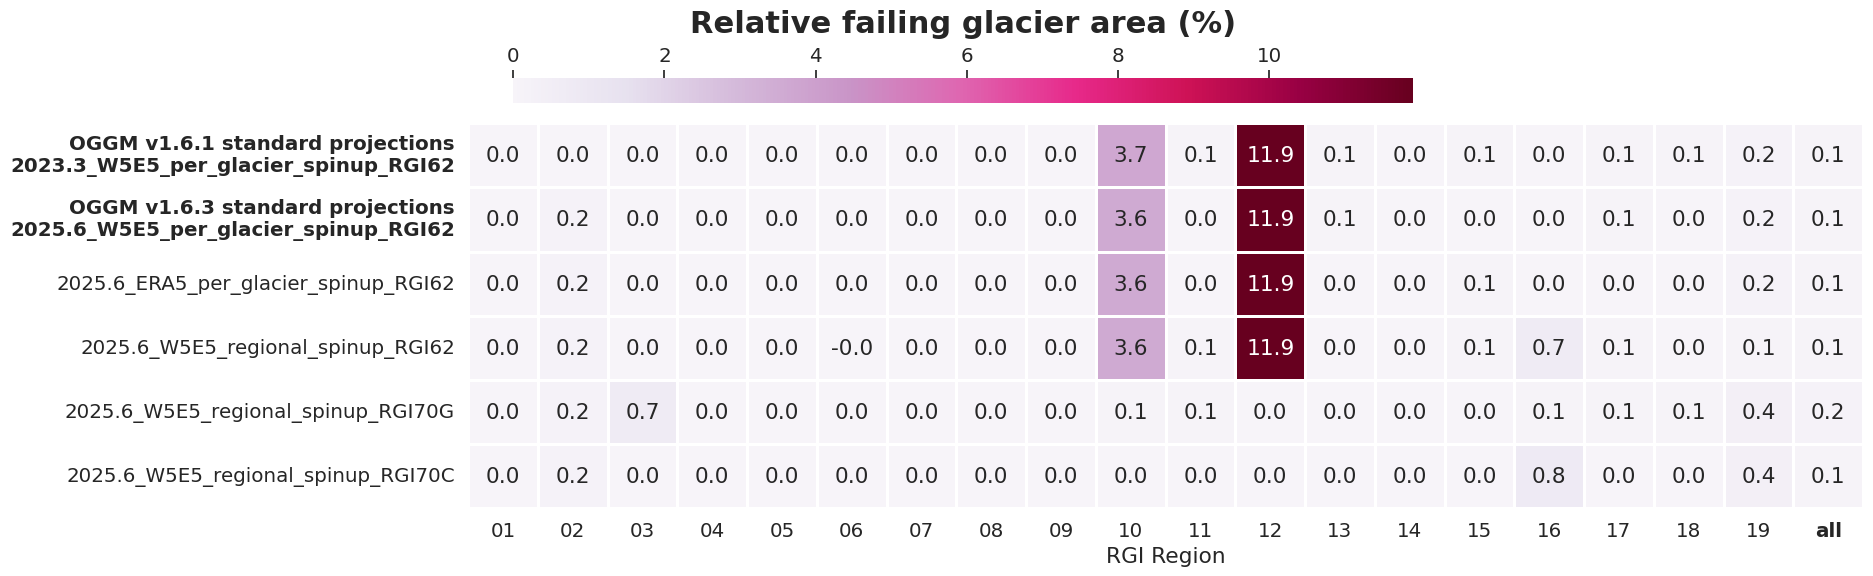

In [275]:
fig = plt.figure(figsize=(18,5))
fig.subplots_adjust(top=0.88)

ax = fig.add_subplot(111)

sns.set(font_scale = 1.3)

_pd_stats_all = pd_stats_all.loc[pd_stats_all.version_option_border_rgiv != '2023.3_W5E5_per_glacier_spinup_b_080_RGI62']
assert np.all(_pd_stats_all.border == 'b_160')
pd_sel_area_miss = _pd_stats_all[['rgi_reg','version_option_rgiv','perc_area_miss']].dropna().pivot(columns='version_option_rgiv', index = 'rgi_reg')
pd_sel_area_miss.columns = pd_sel_area_miss.columns.get_level_values(1)
pd_sel_area_miss = pd_sel_area_miss.astype(float).round(1)
pd_sel_area_miss = pd_sel_area_miss[version_order]

# colorbar axis above the heatmap
cbar_ax = fig.add_axes([0.15, 0.92, 0.5, 0.05])
sns.heatmap(pd_sel_area_miss.T,
            ax=ax,
            #y= 'rgi_reg', x='option_version_border',
            linewidths=.8, cmap="PuRd", cbar_ax=cbar_ax, 
            cbar_kws={"orientation": "horizontal","pad": 0.08},      # distance from the heatmap
           annot=True, fmt=".1f")
cbar = ax.collections[0].colorbar
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('top')

# label text
cbar.set_label('Relative failing glacier area (%)',
    fontsize=22,
    fontweight="bold",
    labelpad=10
)
cbar.ax.xaxis.label.set_horizontalalignment("center")

ax.set_ylabel('')
ax.set_xlabel('RGI Region')
bold_labels = ['all',  'OGGM v1.6.1 standard projections\n2023.3_W5E5_per_glacier_spinup_RGI62', 'OGGM v1.6.3 standard projections\n2025.6_W5E5_per_glacier_spinup_RGI62'] 
for label in ax.get_xticklabels():
    if label.get_text() in bold_labels:
        label.set_fontweight('bold')
for label in ax.get_yticklabels():
    if label.get_text() in bold_labels:
        label.set_fontweight('bold')
plt.savefig('error_analysis_2025_6_w5e5_era5_vs_2023_3_spinup_calib_prepro_failing_glacier_area_rgi6_7.png', bbox_inches="tight")
#plt.savefig('error_analysis_2025_6_old_vs_new_bias_vs_2023_3_prepro_failing_glacier_area.png')

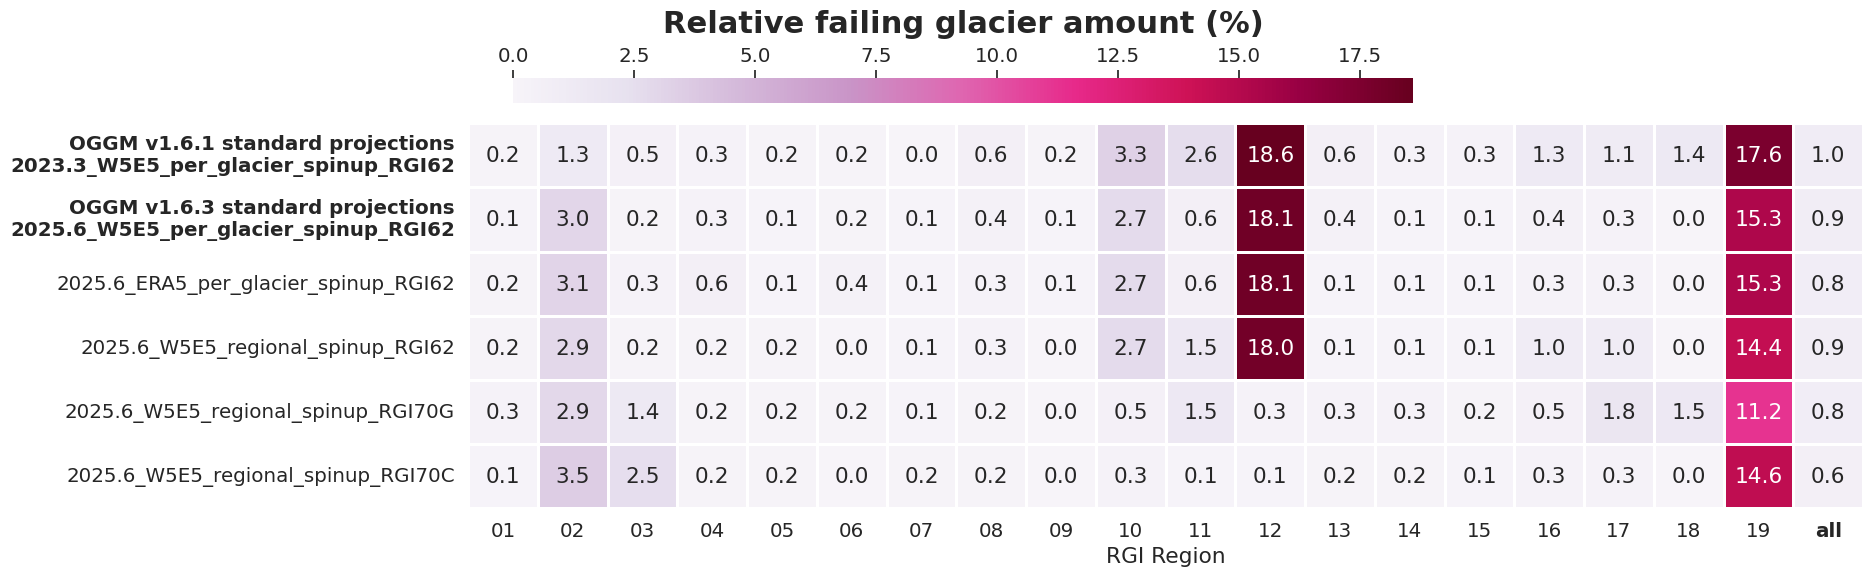

In [273]:
fig = plt.figure(figsize=(18,5))
fig.subplots_adjust(top=0.88)

ax = fig.add_subplot(111)

sns.set(font_scale = 1.3)
_pd_stats_all = pd_stats_all.loc[pd_stats_all.version_option_border_rgiv != '2023.3_W5E5_per_glacier_spinup_b_080_RGI62']
assert np.all(_pd_stats_all.border == 'b_160')
pd_sel_glac_miss = _pd_stats_all[['rgi_reg','version_option_rgiv','perc_glac_miss']].dropna().pivot(columns='version_option_rgiv', index = 'rgi_reg')
pd_sel_glac_miss.columns = pd_sel_glac_miss.columns.get_level_values(1)
pd_sel_glac_miss = pd_sel_glac_miss.astype(float).round(1)
pd_sel_glac_miss = pd_sel_glac_miss[version_order]


# colorbar axis above the heatmap
cbar_ax = fig.add_axes([0.15, 0.92, 0.5, 0.05])
sns.heatmap(pd_sel_glac_miss.T,
            ax=ax,
            #y= 'rgi_reg', x='option_version_border',
            linewidths=.8, cmap="PuRd", cbar_ax=cbar_ax, 
            cbar_kws={ "orientation": "horizontal",
                                                   "pad": 0.08},      # distance from the heatmap
                                                    #"label": "Relative failing glacier area (%)"},
           annot=True, fmt=".1f")
cbar = ax.collections[0].colorbar
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('top')

# label text
cbar.set_label('Relative failing glacier amount (%)',
    fontsize=22,
    fontweight="bold",
    labelpad=10
)
cbar.ax.xaxis.label.set_horizontalalignment("center")

ax.set_ylabel('')
ax.set_xlabel('RGI Region')
bold_labels = ['all',  'OGGM v1.6.1 standard projections\n2023.3_W5E5_per_glacier_spinup_RGI62', 'OGGM v1.6.3 standard projections\n2025.6_W5E5_per_glacier_spinup_RGI62'] 
for label in ax.get_xticklabels():
    if label.get_text() in bold_labels:
        label.set_fontweight('bold')
for label in ax.get_yticklabels():
    if label.get_text() in bold_labels:
        label.set_fontweight('bold')
plt.savefig('error_analysis_2025_6_w5e5_era5_vs_2023_3_spinup_calib_prepro_failing_glaciers_rgi6_7.png', bbox_inches="tight")
#plt.savefig('error_analysis_2025_6_old_vs_new_bias_vs_2023_3_prepro_failing_glaciers.png')

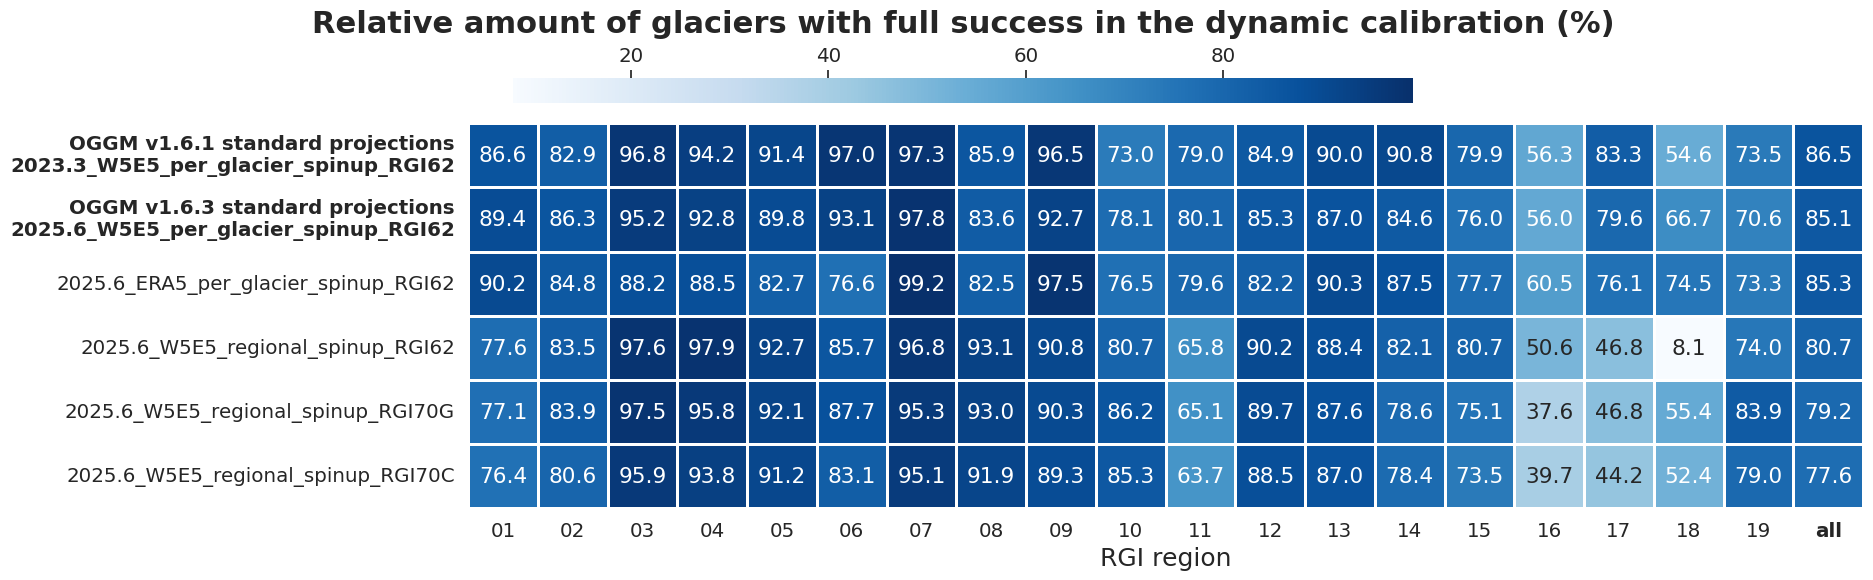

In [269]:
fig = plt.figure(figsize=(18,5))
fig.subplots_adjust(top=0.88)
# main heatmap axis
ax = fig.add_subplot(111)

sns.set(font_scale = 1.3)
_pd_stats_all = pd_stats_all.loc[pd_stats_all.version_option_border_rgiv != '2023.3_W5E5_per_glacier_spinup_b_080_RGI62']
assert np.all(_pd_stats_all.border == 'b_160')
pd_sel_dynamic_success_total = _pd_stats_all[['rgi_reg','version_option_rgiv',
                                             'dynamic calib full success / total (%)']].dropna().pivot(columns='version_option_rgiv',
                                                                                                       index = 'rgi_reg')

pd_sel_dynamic_success_total.columns = pd_sel_dynamic_success_total.columns.get_level_values(1)
pd_sel_dynamic_success_total = pd_sel_dynamic_success_total.astype(float).round(1)
pd_sel_dynamic_success_total = pd_sel_dynamic_success_total.dropna(axis=1, how='all')
pd_sel_dynamic_success_total = pd_sel_dynamic_success_total[version_order]

# colorbar axis above the heatmap
cbar_ax = fig.add_axes([0.15, 0.92, 0.5, 0.05])
sns.heatmap(pd_sel_dynamic_success_total.T,
            ax=ax,
            #y= 'rgi_reg', x='option_version_border',
            linewidths=.8, cmap="Blues", cbar_ax=cbar_ax, 
            cbar_kws={"orientation": "horizontal","pad": 0.08},      # distance from the heatmap
                                                    #"label": "Relative failing glacier area (%)"},
           annot=True, fmt=".1f")
cbar = ax.collections[0].colorbar
cbar = ax.collections[0].colorbar
# label text
cbar.set_label('Relative amount of glaciers with full success in the dynamic calibration (%)',
    fontsize=22,
    fontweight="bold",
    labelpad=10
)
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.label.set_horizontalalignment("center")

ax.figure.axes[-1].yaxis.label.set_size(18)
ax.set_xlabel('RGI region', fontsize=18)
ax.set_ylabel('')
#plt.tight_layout()
bold_labels = ['all',  'OGGM v1.6.1 standard projections\n2023.3_W5E5_per_glacier_spinup_RGI62', 'OGGM v1.6.3 standard projections\n2025.6_W5E5_per_glacier_spinup_RGI62'] 
for label in ax.get_xticklabels():
    if label.get_text() in bold_labels:
        label.set_fontweight('bold')
for label in ax.get_yticklabels():
    if label.get_text() in bold_labels:
        label.set_fontweight('bold')
#plt.tight_layout(rect=[0, 0, 1, 0.85])  # leave space for colorbar
plt.savefig('error_analysis_2025_6_w5e5_era5_vs_2023_3_spinup_calib_rgi6_7.png', bbox_inches="tight")

**--> if you want to look at error analyses of previous oggm versions, check out this notebook: http://nbviewer.org/urls/cluster.klima.uni-bremen.de/~lschuster/error_analysis/error_analysis_oggm_v16_2023.3.ipynb**

## Additional error analysis to assess the occurrence of the different error types

In [233]:
def error_analysis_w_plot(dfserr={}, pd_rel_error_area = None,
                          level='L2', 
                          rgiv = '', option = '', border = 'b_160',
                          version = '',exp='elev_bands',
                          rgi_reg = 'all', 
                          path = '/home/www/oggm/gdirs/oggm_v1.6', subplot = False, xlim=None, plot=True, rename_match =True):

    """ Estimates for a specific preprocessed gdirs the relative glacier area with errors
    and the relative amount of glaciers with errors (both in %). 
    
    Plots the error counts for the different error types.
    
    Works only if the glacier statistics were estimated!
    
    Parameters
    ----------
    dfserr : dictionary
        dictionary where already errors of largest glaciers from other preprocessed gdirs are saved, default is an empty dictionary
    pd_rel_error_area : pd.DataFrame
        pandas DataFrame with statistics about relative area and amount of errors on glaciers. 
        Default is None, which creates a new pandas DataFrame
    level : str
        the preprocessing level where the errors should be estimated and plotted.
        So far, it works only for 'L2' and 'L5'. Default is 'L2'.
    exp : str
        which glacier flowlines are used. Either 'elev_bands' (default) or 'centerlines'
    border : str
        which size of the local glacier map was used (prepro_border). In morerecent oggm versions,
        we usually use b_160. 
    rgi_reg : str
        default is all RGI regions. But you can also choose a single RGI region (e.g. rgi_reg = '11')
    rgiv : str
        RGI versions ('RGI62', 'RGI70G', 'RGI70C')
    option : str
        currently: 'W5E5_per_glacier','W5E5_per_glacier_spinup', 'W5E5_regional_spinup', 'ERA5_per_glacier_spinup'
    path : str
        path to the general gdirs folder
    subplot : bool
        Default is False. If you want to use several plots, set it to True
    xlim : int
        Default is None. Maximum of single type errors in the plot. Useful for subplots
    plot : bool
        If an error type plot should be returned or not!
    
    Returns
    -------
    dfserr : dictionary
        dictionary where for each preprocessed gdir, a pd.DataFrame exists which lists the 
        type of errors and area of the 15 largest glaciers with errors
    pd_rel_error_area : pd.DataFrame
        pandas DataFrame with statistics about relative area and amount of errors on glaciers. 
        If repeated, for several preprocessed gdirs, each row represents the statistics of 
        one preprocessed gdirs.
        
    """
    if pd_rel_error_area is None:
        pd_rel_error_area = pd.DataFrame(columns=['rel_error_area_in_percent', 'level', 'version', 'option', 'rgiv', 'border'])

    if level == 'L2':
        fd = f'{path}/L1-L2_files/{version}/{exp}/{rgiv}/{border}/L2/summary/'
        title = f'{level}: {version} {exp}, {rgiv}, {border}, rgi_{rgi_reg}'
        dict_key = f'{level}_{version}_{exp}_{rgiv}_{border}_rgi_{rgi_reg}'
    elif level == 'L5':

        if (version == '2023.3') and (option == 'W5E5_per_glacier_spinup'):
            fd = f'L3-L5_files/{version}/elev_bands/W5E5_spinup/{rgiv}/{border}/L5/summary/'
        elif  (version == '2023.3') and (option == 'W5E5_per_glacier'):
            fd = f'L3-L5_files/{version}/elev_bands/W5E5/{rgiv}/{border}/L5/summary/'
        else:
            optis = option.split('_')
            opt1 = optis[0]
            opt2 = option[len(opt1)+1:]
            fd = f'L3-L5_files/{version}/elev_bands/{opt1}/{opt2}/{rgiv}/{border}/L5/summary/'
        
        fd = f'{path}/{fd}'

        title = f'{level}: {version}, {option}, {rgiv}, {border}, rgi_{rgi_reg}' # exp
        dict_key = f'{level}_{version}_{option}_{rgiv}_{border}_{rgi_reg}' # exp not necessary here
    else:
        raise InvalidParamsError('Only L2 and L5 can be used, but the function can be adapted easily in order that it works for other levels!')


    print(path,version, option, exp, fd)
    # get the statistics file which lists errors and their type
    fs = glob.glob(fd+'glacier_statistics*.csv')
    
    if rgi_reg == 'all':
        print(len(fs))
        assert len(fs) == 19
    else:
        for f in fs:
            if f'statistics_{rgi_reg}' in f:
                fs = [f]
                break
        assert len(fs) == 1
    
    df = []
    for f in fs:
        df.append(pd.read_csv(f, index_col=0, low_memory=False))
    df = pd.concat(df).sort_index()
    
    rel_error_area = df.loc[~df['error_task'].isnull()].rgi_area_km2.sum() / df.rgi_area_km2.sum() * 100
    
    # plot the amount of errors for each error type
    if plot:
        title = title + '\n relative glacier area with errors: {:.3f}%'.format(rel_error_area.round(3))
        if not subplot:
            plt.figure()
        plt.title(title, fontsize=12)
        sns.countplot(y="error_task", data=df.sort_values(by='error_task'));
        if xlim is not None:
            plt.xlim([0,xlim])

    # save the glaciers that result in errors sorted from largest to smallest glacier area
    dfserr[dict_key] = df.loc[~df['error_task'].isnull()].sort_values(by='rgi_area_km2', ascending=False)[['rgi_area_km2', 'error_task', 'error_msg']]
    # save statistics about relative area and amount of errors on glaciers
    pd_rel_error_area.loc[dict_key] = np.NaN
    pd_rel_error_area.loc[dict_key,'rel_error_area_in_percent'] = rel_error_area
    pd_rel_error_area.loc[dict_key,'rgi_reg'] = rgi_reg
    pd_rel_error_area.loc[dict_key,'level'] = level
    pd_rel_error_area.loc[dict_key,'border'] = border
    pd_rel_error_area.loc[dict_key,'option'] = option
    pd_rel_error_area.loc[dict_key,'rgiv'] = rgiv
    pd_rel_error_area.loc[dict_key,'version'] = version
    pd_rel_error_area.loc[dict_key,'exp'] = exp
    
    return dfserr, pd_rel_error_area

In [223]:
# could be changed, but not all pre-processed directories are available for all prepro_border options!
border = 'b_160' # 80 if qc0
# these are just containers to save and later compare the error statistics! 
dfserr = {}

pd_rel_error_area = pd.DataFrame(columns=['rel_error_area_in_percent', 'level', 'version', 'option', 'rgiv', 'border', 'rgi_reg','exp'])


### Analysis for Level 2 pre-processing directories!

In pre-processing level 2, we only distinguish between elevation bands and centerlines (see the [Flowlines documentation](https://docs.oggm.org/en/stable/flowlines.html#glacier-flowlines) for an explanation about the differences). 

/home/www/oggm/gdirs/oggm_v1.6 elev_bands /home/www/oggm/gdirs/oggm_v1.6/L1-L2_files/2025.6/elev_bands/RGI62/b_160/L2/summary/
19


/tmp/ipykernel_778936/3317720902.py:119: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'all' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  pd_rel_error_area.loc[dict_key,'rgi_reg'] = rgi_reg
/tmp/ipykernel_778936/3317720902.py:120: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'L2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  pd_rel_error_area.loc[dict_key,'level'] = level
/tmp/ipykernel_778936/3317720902.py:121: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'b_160' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  pd_rel_error_area.loc[dict_key,'border'] = border
/tmp/ipykernel_778936/3317720902.py:122: FutureWarn

/home/www/oggm/gdirs/oggm_v1.6 elev_bands /home/www/oggm/gdirs/oggm_v1.6/L1-L2_files/2025.6/elev_bands/RGI70G/b_160/L2/summary/
19
/home/www/oggm/gdirs/oggm_v1.6 elev_bands /home/www/oggm/gdirs/oggm_v1.6/L1-L2_files/2025.6/elev_bands/RGI70C/b_160/L2/summary/
19
/home/www/oggm/gdirs/oggm_v1.6 centerlines /home/www/oggm/gdirs/oggm_v1.6/L1-L2_files/2025.6/centerlines/RGI62/b_010/L2/summary/
19
/home/www/oggm/gdirs/oggm_v1.6 centerlines /home/www/oggm/gdirs/oggm_v1.6/L1-L2_files/2025.6/centerlines/RGI70G/b_010/L2/summary/
19


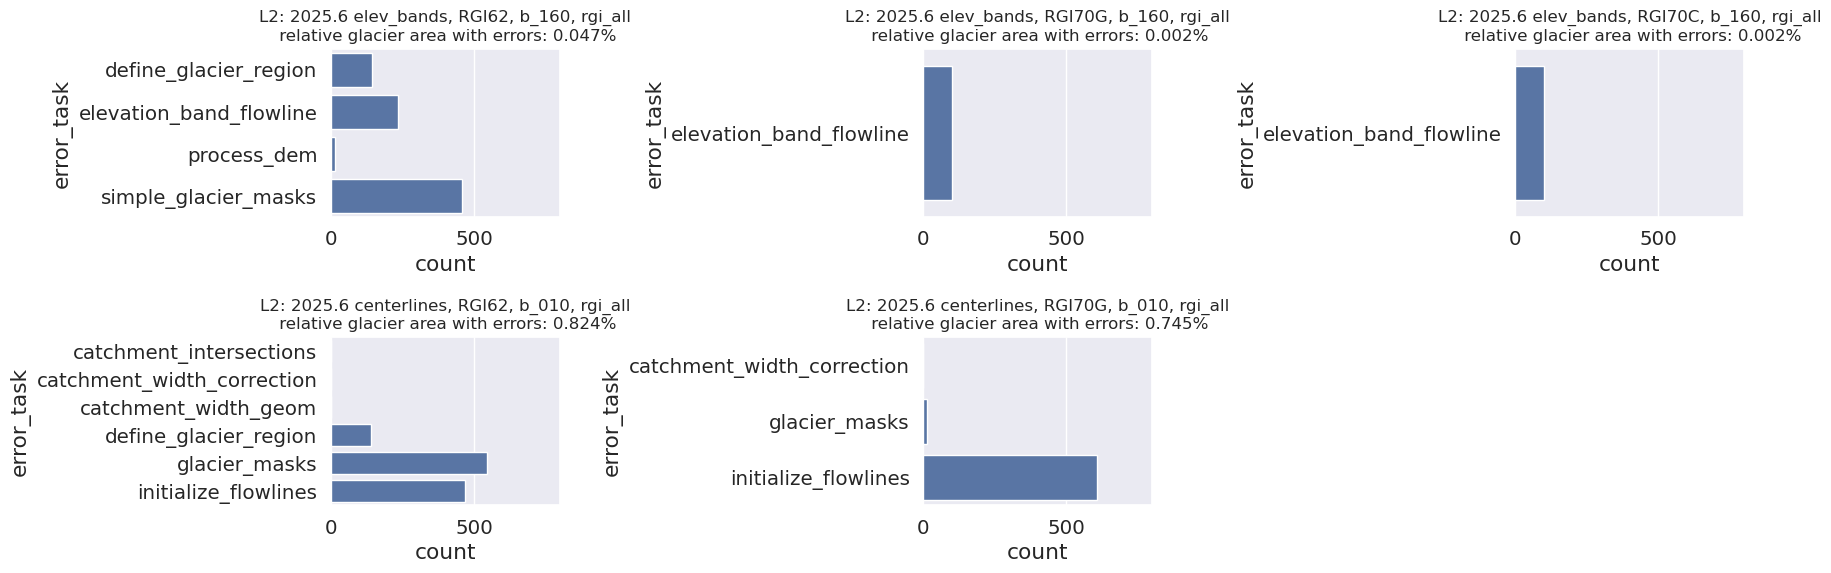

In [224]:
plt.figure(figsize=(18,6))
plt.subplot(231)
dfserr, pd_rel_error_area = error_analysis_w_plot(dfserr=dfserr, pd_rel_error_area=pd_rel_error_area,
                                                  level='L2', subplot=True,version='2025.6',rgiv='RGI62',
                                                  exp='elev_bands', border=border, xlim = 800)


plt.subplot(232)
dfserr, pd_rel_error_area = error_analysis_w_plot(dfserr=dfserr, pd_rel_error_area=pd_rel_error_area,
                                                  level='L2', subplot=True,version='2025.6',rgiv='RGI70G',
                                                  exp='elev_bands', border=border, xlim = 800)
plt.subplot(233)
dfserr, pd_rel_error_area = error_analysis_w_plot(dfserr=dfserr, pd_rel_error_area=pd_rel_error_area,
                                                  level='L2',  subplot=True,version='2025.6',rgiv='RGI70C',
                                                  exp='elev_bands', border=border, xlim = 800)

plt.subplot(234)
dfserr, pd_rel_error_area = error_analysis_w_plot(dfserr=dfserr, pd_rel_error_area=pd_rel_error_area,
                                                  level='L2',  subplot=True,version='2025.6',rgiv='RGI62',
                                                  exp='centerlines', border='b_010', xlim = 800)

plt.subplot(235)
dfserr, pd_rel_error_area = error_analysis_w_plot(dfserr=dfserr, pd_rel_error_area=pd_rel_error_area,
                                                  level='L2',  subplot=True,version='2025.6',rgiv='RGI70G',
                                                  exp='centerlines', border='b_010', xlim = 800)
plt.tight_layout()

- failing glacier area on pre-processing level 2 is <0.05% or less
- when using RGI70G or RGI70C with elevation band flowlines, the L2 errors occur for only around 0.002% of the area 
- less glaciers will fail when using elev_bands than centerlines

**Here you can analyse the failing glaciers with the largest area and the type of error that has occurred!**

In [225]:
dfserr['L2_2025.6_elev_bands_RGI62_b_160_rgi_all'].head()

rgi_area_km2               error_task  \
rgi_id                                                  
RGI60-10.00002        48.144     simple_glacier_masks   
RGI60-10.00006        12.966     simple_glacier_masks   
RGI60-12.01364         9.250     simple_glacier_masks   
RGI60-19.01402         7.482  elevation_band_flowline   
RGI60-19.01367         7.271  elevation_band_flowline   

                                                                      error_msg  
rgi_id                                                                           
RGI60-10.00002              GeometryError: RGI60-10.00002 is a nominal glacier.  
RGI60-10.00006              GeometryError: RGI60-10.00006 is a nominal glacier.  
RGI60-12.01364              GeometryError: RGI60-12.01364 is a nominal glacier.  
RGI60-19.01402  InvalidDEMError: (RGI60-19.01402) DEM altidude range too small.  
RGI60-19.01367  InvalidDEMError: (RGI60-19.01367) DEM altidude range too small.

In [226]:
dfserr['L2_2025.6_elev_bands_RGI70G_b_160_rgi_all'].head()

rgi_area_km2               error_task  \
rgi_id                                                           
RGI2000-v7.0-G-19-01800      4.820092  elevation_band_flowline   
RGI2000-v7.0-G-19-01781      1.943465  elevation_band_flowline   
RGI2000-v7.0-G-19-01909      0.457315  elevation_band_flowline   
RGI2000-v7.0-G-19-02222      0.396692  elevation_band_flowline   
RGI2000-v7.0-G-03-05085      0.282999  elevation_band_flowline   

                                                                                        error_msg  
rgi_id                                                                                             
RGI2000-v7.0-G-19-01800  InvalidDEMError: (RGI2000-v7.0-G-19-01800) DEM altidude range too small.  
RGI2000-v7.0-G-19-01781  InvalidDEMError: (RGI2000-v7.0-G-19-01781) DEM altidude range too small.  
RGI2000-v7.0-G-19-01909  InvalidDEMError: (RGI2000-v7.0-G-19-01909) DEM altidude range too small.  
RGI2000-v7.0-G-19-02222  InvalidDEMError: (RGI2000-v7.0-G-19-02222) DEM altidude range too small.  
RGI2000-v7.0-G-03-05085  InvalidDEMError: (RGI2000-v7.0-G-03-05085) DEM altidude range too small.

Let's just look at the level 2 errors for only RGI region 12 

/home/www/oggm/gdirs/oggm_v1.6 elev_bands /home/www/oggm/gdirs/oggm_v1.6/L1-L2_files/2025.6/elev_bands/RGI62/b_160/L2/summary/
/home/www/oggm/gdirs/oggm_v1.6 elev_bands /home/www/oggm/gdirs/oggm_v1.6/L1-L2_files/2025.6/elev_bands/RGI70G/b_160/L2/summary/
/home/www/oggm/gdirs/oggm_v1.6 elev_bands /home/www/oggm/gdirs/oggm_v1.6/L1-L2_files/2025.6/elev_bands/RGI70C/b_160/L2/summary/
/home/www/oggm/gdirs/oggm_v1.6 centerlines /home/www/oggm/gdirs/oggm_v1.6/L1-L2_files/2025.6/centerlines/RGI62/b_010/L2/summary/
/home/www/oggm/gdirs/oggm_v1.6 centerlines /home/www/oggm/gdirs/oggm_v1.6/L1-L2_files/2025.6/centerlines/RGI70G/b_010/L2/summary/


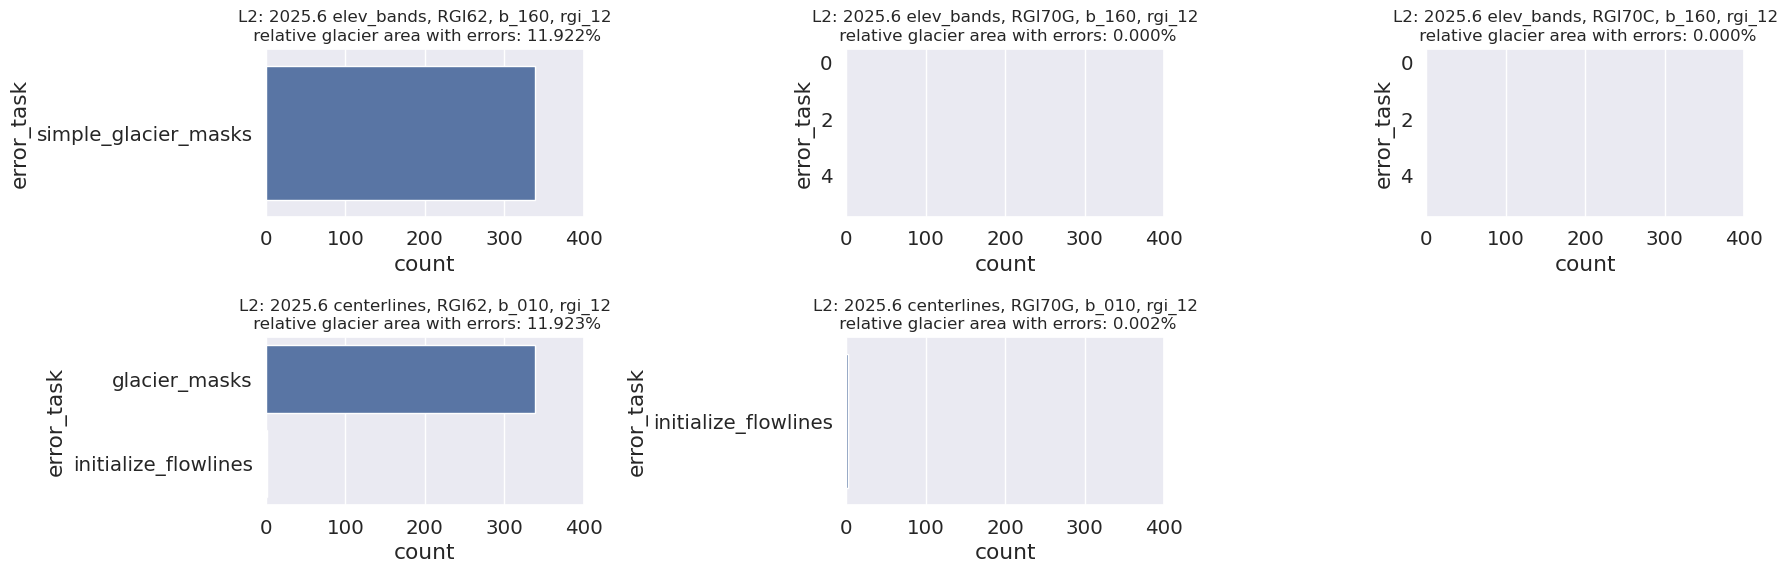

In [227]:
rgi_reg = 12
plt.figure(figsize=(18,6))
plt.subplot(231)
dfserr, pd_rel_error_area = error_analysis_w_plot(dfserr=dfserr, pd_rel_error_area=pd_rel_error_area,
                                                  level='L2', subplot=True,version='2025.6',rgiv='RGI62',
                                                  exp='elev_bands', border=border, xlim = 400, rgi_reg=rgi_reg)


plt.subplot(232)
dfserr, pd_rel_error_area = error_analysis_w_plot(dfserr=dfserr, pd_rel_error_area=pd_rel_error_area,
                                                  level='L2', subplot=True,version='2025.6',rgiv='RGI70G',
                                                  exp='elev_bands', border=border, xlim = 400, rgi_reg=rgi_reg)
plt.subplot(233)
dfserr, pd_rel_error_area = error_analysis_w_plot(dfserr=dfserr, pd_rel_error_area=pd_rel_error_area,
                                                  level='L2',  subplot=True,version='2025.6',rgiv='RGI70C',
                                                  exp='elev_bands', border=border, xlim = 400, rgi_reg=rgi_reg)

plt.subplot(234)
dfserr, pd_rel_error_area = error_analysis_w_plot(dfserr=dfserr, pd_rel_error_area=pd_rel_error_area,
                                                  level='L2',  subplot=True,version='2025.6',rgiv='RGI62',
                                                  exp='centerlines', border='b_010', xlim = 400, rgi_reg=rgi_reg)

plt.subplot(235)
dfserr, pd_rel_error_area = error_analysis_w_plot(dfserr=dfserr, pd_rel_error_area=pd_rel_error_area,
                                                  level='L2',  subplot=True,version='2025.6',rgiv='RGI70G',
                                                  exp='centerlines', border='b_010', xlim = 400, rgi_reg=rgi_reg)
plt.tight_layout()

In [228]:
dfserr['L2_2025.6_elev_bands_RGI62_b_160_rgi_all']['error_msg']

rgi_id
RGI60-10.00002                GeometryError: RGI60-10.00002 is a nominal glacier.
RGI60-10.00006                GeometryError: RGI60-10.00006 is a nominal glacier.
RGI60-12.01364                GeometryError: RGI60-12.01364 is a nominal glacier.
RGI60-19.01402    InvalidDEMError: (RGI60-19.01402) DEM altidude range too small.
RGI60-19.01367    InvalidDEMError: (RGI60-19.01367) DEM altidude range too small.
                                               ...                               
RGI60-10.00027                GeometryError: RGI60-10.00027 is a nominal glacier.
RGI60-10.00026                GeometryError: RGI60-10.00026 is a nominal glacier.
RGI60-10.00023                GeometryError: RGI60-10.00023 is a nominal glacier.
RGI60-10.00100                GeometryError: RGI60-10.00100 is a nominal glacier.
RGI60-10.00069                GeometryError: RGI60-10.00069 is a nominal glacier.
Name: error_msg, Length: 853, dtype: object

- In RGI region 12, ~12% of the glacier area can not run when using RGI62 even in pre-processing level 2. The reasons are glacier masks errors because many of the glaciers in RGI region 12 are "nominal" glaciers. Nominal means here that the glaciers don't have a glacier outline but only a location and area and hence can not be run with OGGM.
- **With RGI70, these errors got removed, and there is basically no failing glacier area anymore in region 12**

### Analysis for Level 5 pre-processing directories! 

In pre-processing level 5, we distinguish between:
- no spinup (`per_glacier`), per-glacier spinup (`per_glacier_spinup`) and regional spinup (`regional_spinup`)
- W5E5 and ERA5
- RGI62, RGI70G, RGI70C

/home/www/oggm/gdirs/oggm_v1.6 2025.6 W5E5_per_glacier elev_bands /home/www/oggm/gdirs/oggm_v1.6/L3-L5_files/2025.6/elev_bands/W5E5/per_glacier/RGI62/b_080/L5/summary/
19
/home/www/oggm/gdirs/oggm_v1.6 2025.6 W5E5_per_glacier_spinup elev_bands /home/www/oggm/gdirs/oggm_v1.6/L3-L5_files/2025.6/elev_bands/W5E5/per_glacier_spinup/RGI62/b_160/L5/summary/
19
/home/www/oggm/gdirs/oggm_v1.6 2025.6 ERA5_per_glacier_spinup elev_bands /home/www/oggm/gdirs/oggm_v1.6/L3-L5_files/2025.6/elev_bands/ERA5/per_glacier_spinup/RGI62/b_160/L5/summary/
19
/home/www/oggm/gdirs/oggm_v1.6 2025.6 W5E5_regional_spinup elev_bands /home/www/oggm/gdirs/oggm_v1.6/L3-L5_files/2025.6/elev_bands/W5E5/regional_spinup/RGI62/b_160/L5/summary/
19
/home/www/oggm/gdirs/oggm_v1.6 2025.6 W5E5_regional_spinup elev_bands /home/www/oggm/gdirs/oggm_v1.6/L3-L5_files/2025.6/elev_bands/W5E5/regional_spinup/RGI70G/b_160/L5/summary/
19
/home/www/oggm/gdirs/oggm_v1.6 2025.6 W5E5_regional_spinup elev_bands /home/www/oggm/gdirs/oggm_v1.6

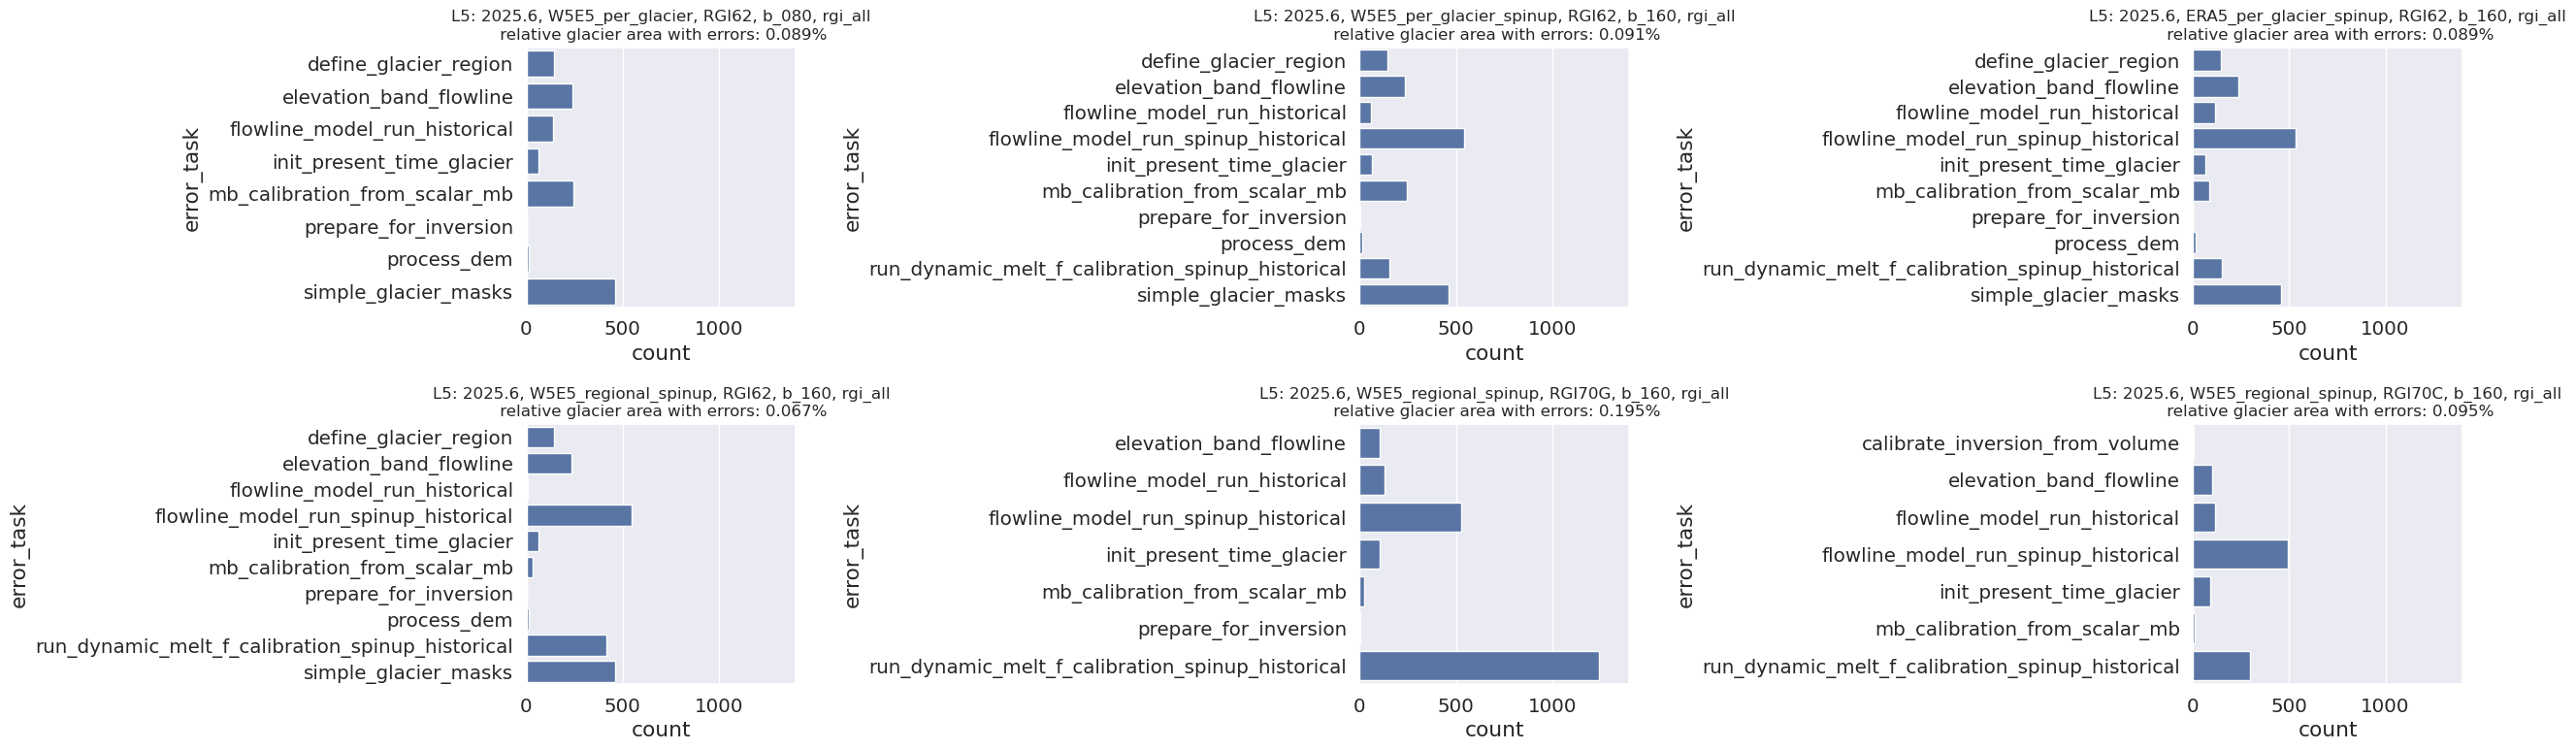

In [234]:
level = 'L5'
rgi_reg = 'all'
plt.figure(figsize=(26,8))


plt.subplot(231)
option = 'W5E5_per_glacier'
dfserr, pd_rel_error_area = error_analysis_w_plot(dfserr=dfserr, pd_rel_error_area=pd_rel_error_area,
                                                  level=level, subplot=True,version='2025.6',rgiv='RGI62',
                                                  option = option,
                                                  exp='elev_bands', border='b_080', xlim = 1400, rgi_reg=rgi_reg) # only available for border 80

plt.subplot(232)
option = 'W5E5_per_glacier_spinup'
dfserr, pd_rel_error_area = error_analysis_w_plot(dfserr=dfserr, pd_rel_error_area=pd_rel_error_area,
                                                  level=level, subplot=True,version='2025.6',rgiv='RGI62',
                                                  option = option,
                                                  exp='elev_bands', border=border, xlim = 1400, rgi_reg=rgi_reg)
plt.subplot(233)
option = 'ERA5_per_glacier_spinup'

dfserr, pd_rel_error_area = error_analysis_w_plot(dfserr=dfserr, pd_rel_error_area=pd_rel_error_area,
                                                  level=level,  subplot=True,version='2025.6',rgiv='RGI62',
                                                  option = option,
                                                  exp='elev_bands', border=border, xlim = 1400, rgi_reg=rgi_reg)
##########
option = 'W5E5_regional_spinup'

plt.subplot(234)
dfserr, pd_rel_error_area = error_analysis_w_plot(dfserr=dfserr, pd_rel_error_area=pd_rel_error_area,
                                                  level=level, subplot=True,version='2025.6',rgiv='RGI62',
                                                  option = option,
                                                  exp='elev_bands', border=border, xlim = 1400, rgi_reg=rgi_reg)

plt.subplot(235)
dfserr, pd_rel_error_area = error_analysis_w_plot(dfserr=dfserr, pd_rel_error_area=pd_rel_error_area,
                                                  level=level, subplot=True,version='2025.6',rgiv='RGI70G',
                                                  option = option,
                                                  exp='elev_bands', border=border, xlim = 1400, rgi_reg=rgi_reg)
plt.subplot(236)
dfserr, pd_rel_error_area = error_analysis_w_plot(dfserr=dfserr, pd_rel_error_area=pd_rel_error_area,
                                                  level=level,  subplot=True,version='2025.6',rgiv='RGI70C',
                                                  option = option,
                                                  exp='elev_bands', border=border, xlim = 1400, rgi_reg=rgi_reg)

plt.tight_layout()

--> if you want to look at error analyses of previous oggm versions, check out this notebook: http://nbviewer.org/urls/cluster.klima.uni-bremen.de/~lschuster/error_analysis/error_analysis_oggm_v16_2023.3.ipynb